# Qstick Indicator 

https://www.investopedia.com/terms/q/qstick.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'GLD'
start = '2018-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,124.660004,125.180000,124.389999,125.150002,125.150002,11762500
2018-01-03,125.050003,125.089996,124.099998,124.820000,124.820000,7904300
2018-01-04,124.889999,125.849998,124.739998,125.459999,125.459999,7329700
2018-01-05,124.930000,125.480003,124.830002,125.330002,125.330002,5739900
2018-01-08,125.199997,125.320000,124.900002,125.309998,125.309998,3566700


In [3]:
import talib as ta

In [4]:
#EMAC = ta.EMA(df['Adj Close'], timeperiod=10)
#EMAO = ta.EMA(df['Open'], timeperiod=10)
CO = df['Adj Close'] - df['Open']
#df['QStick'] = EMAC - EMAO
df['QStick'] = ta.EMA(CO, timeperiod=10)

In [5]:
df.head(20)

,Open,High,Low,Close,Adj Close,Volume,QStick
Date,,,,,,,
2018-01-02,124.660004,125.180000,124.389999,125.150002,125.150002,11762500,NaN
2018-01-03,125.050003,125.089996,124.099998,124.820000,124.820000,7904300,NaN
2018-01-04,124.889999,125.849998,124.739998,125.459999,125.459999,7329700,NaN
2018-01-05,124.930000,125.480003,124.830002,125.330002,125.330002,5739900,NaN
2018-01-08,125.199997,125.320000,124.900002,125.309998,125.309998,3566700,NaN
2018-01-09,124.489998,124.860001,124.230003,124.730003,124.730003,9153600,NaN
2018-01-10,125.169998,125.309998,124.720001,125.029999,125.029999,14809300,NaN
2018-01-11,125.370003,125.660004,125.250000,125.440002,125.440002,5994700,NaN
2018-01-12,126.010002,127.129997,125.809998,126.959999,126.959999,9258600,NaN


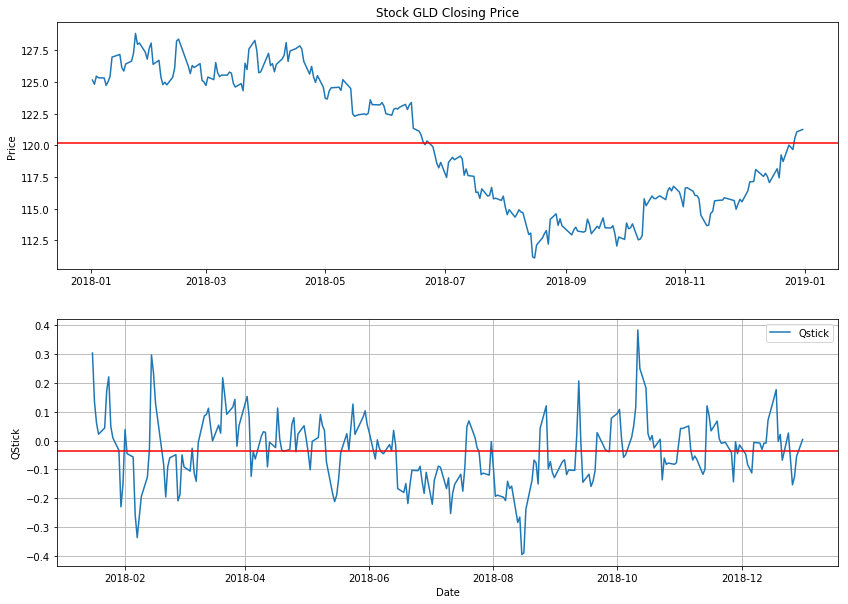

In [6]:
# Line Chart
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Adj Close'])
ax1.axhline(y=df['Adj Close'].mean(),color='r')
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df.index, df['QStick'], label='Qstick')
ax2.axhline(y=df['QStick'].mean(),color='r')
ax2.grid()
ax2.set_ylabel('QStick')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with QStick

In [7]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['QStick'] = (dfc['Adj Close'] - dfc['Open']).rolling(10).mean() 
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,QStick,VolumePositive
0,736710.0,126.599998,127.180000,126.400002,127.169998,127.169998,8083900,0.303000,True
1,736711.0,126.769997,127.220001,125.900002,126.139999,126.139999,10095000,0.191000,False
2,736712.0,126.129997,126.519997,125.800003,125.860001,125.860001,6289300,0.187001,False
3,736713.0,126.570000,126.730003,126.410004,126.419998,126.419998,8773800,0.115001,False
4,736716.0,126.510002,126.750000,126.279999,126.650002,126.650002,4893500,0.089001,True


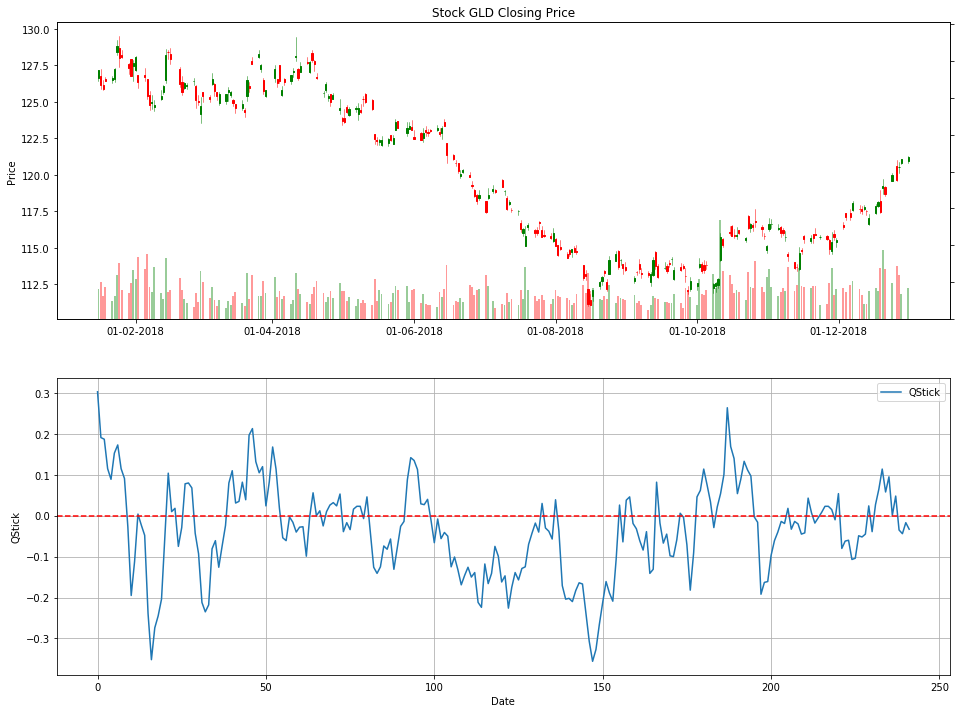

In [10]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(dfc.index, dfc['QStick'], label='QStick')
ax2.axhline(y=0,color='r', linestyle='--')
ax2.grid()
ax2.set_ylabel('QStick')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

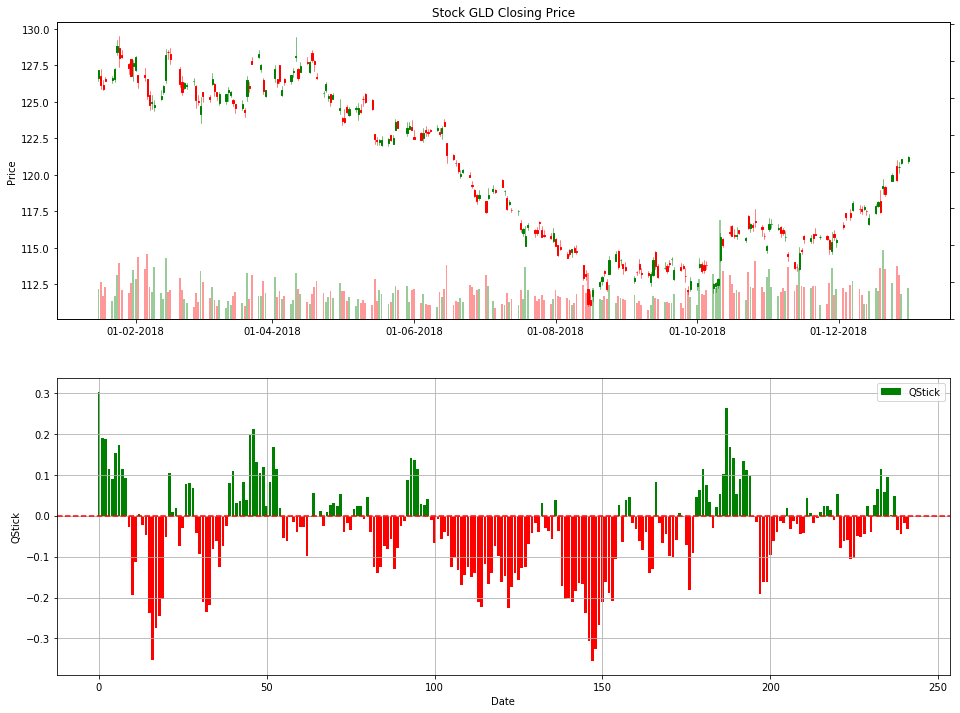

In [11]:
fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
dfc['Positive'] = dfc['QStick'] > 0
ax2.bar(dfc.index, dfc['QStick'], color=dfc.Positive.map({True: 'g', False: 'r'}), label='QStick')
ax2.axhline(y=0,color='r', linestyle='--')
ax2.grid()
ax2.set_ylabel('QStick')
ax2.set_xlabel('Date')
ax2.legend(loc='best')